<a href="https://colab.research.google.com/github/bhoomireddyvijayakumari/FBI-Time-series-forecasting/blob/main/FBI_Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FBI Time series forecasting**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on analyzing and forecasting crime incident trends using time series analysis.
The dataset contains crime records from 1999-2011 with information about crime types, locations,
and temporal features. The goal is to identify patterns, seasonal trends, and build predictive
models to forecast future crime incidents.

Key steps include:
1. Exploratory Data Analysis to understand crime patterns.
2. Time series decomposition to identify trends and seasonality.
3. Feature engineering to extract temporal patterns.
4. Implementation of multiple time series forecasting models.
5. Evaluation and comparison of model performance.


# **GitHub Link -**

https://github.com/bhoomireddyvijayakumari/FBI-Time-series-forecasting.git

# **Problem Statement**


The problem statement of this project is we need to find the crime incident counts using the Machine Learning (ML) models and compare the performance of different models and select the best performing model to deploy into the real world for its application.

# **General Guidelines** : -  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
# Setting the  style for plots
plt.style.use('fivethirtyeight')
%matplotlib inline

### Dataset Loading

In [4]:
# Loading the Dataset into colab python file
train_path = '/content/drive/My Drive/Colab Notebooks/FBI TSF/Train.xlsx'
test_path = '/content/drive/My Drive/Colab Notebooks/FBI TSF/Test (2).csv'
# Reading the files
train_df = pd.read_excel(train_path)
test_df = pd.read_csv(test_path)

### Dataset First View

In [5]:
# Display first 5 rows of train dataset
print("First 5 rows of the dataset:")
display(train_df.head())

First 5 rows of the dataset:


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [6]:
# Display last 5 rows of train dataset
print("Last 5 rows of the dataset:")
display(train_df.tail())

Last 5 rows of the dataset:


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
474560,Theft from Vehicle,E 28TH AVE / FRASER ST,Riley Park,493434.25,5454756.06,49.245542,-123.090211,19.0,0.0,2011,10,29,2011-10-29
474561,Theft from Vehicle,E 28TH AVE / FRASER ST,Riley Park,493434.25,5454756.06,49.245542,-123.090211,23.0,0.0,2011,3,9,2011-03-09
474562,Other Theft,23XX CAMBIE ST,Mount Pleasant,491656.42,5456901.55,49.264820,-123.114682,17.0,52.0,2011,2,10,2011-02-10
474563,Other Theft,7XX BUTE ST,West End,490797.66,5459282.31,49.286223,-123.126541,18.0,0.0,2011,12,20,2011-12-20
474564,Mischief,57XX MAIN ST,Sunset,492605.32,5453354.38,49.232924,-123.101574,18.0,30.0,2011,2,3,2011-02-03


### Dataset Rows & Columns count

In [7]:
#  Train Dataset Rows & Columns count
print(f"Number of rows: {train_df.shape[0]}")
print(f"Number of columns: {train_df.shape[1]}")

Number of rows: 474565
Number of columns: 13


### Dataset Information

In [8]:
#  Train Dataset Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [9]:
# Train dataset duplicate count
duplicate_count = train_df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_count}")

Duplicate Rows: 44618


#### Missing Values/Null Values

In [10]:
# Missing values or null values count
print("\nMissing values in each column:")
display(train_df.isnull().sum())


Missing values in each column:


,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


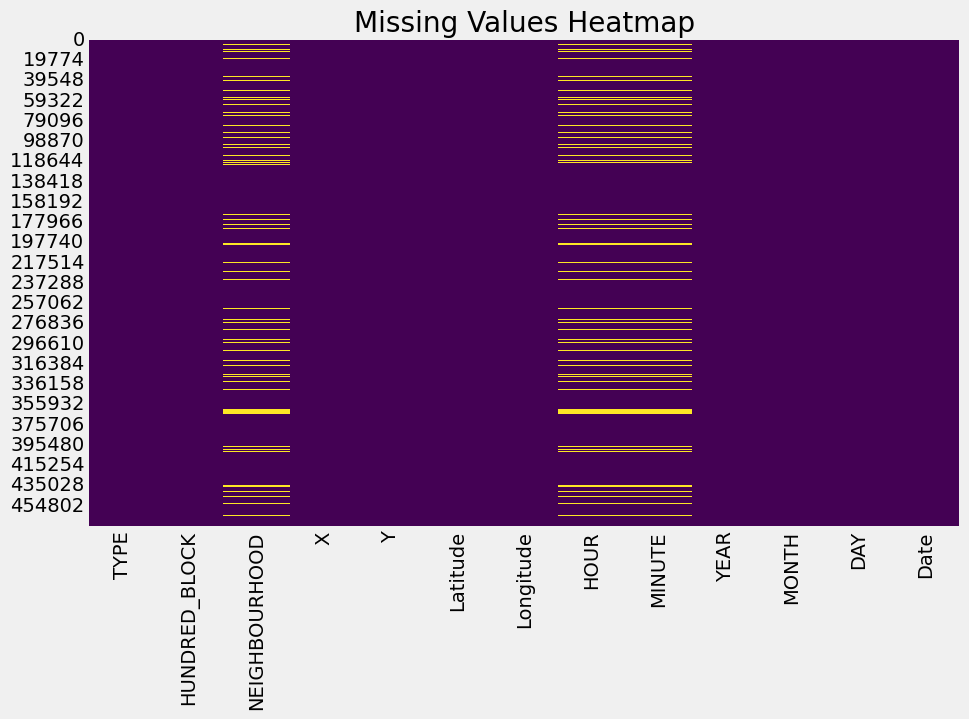

In [11]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [67]:
unique_values = train_df['TYPE'].unique()
print("Unique values:", unique_values)
print("Unique values count:", len(unique_values))

Unique values: ['Other Theft' 'Break and Enter Residential/Other' 'Mischief'
 'Break and Enter Commercial' 'Offence Against a Person'
 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)' 'Theft of Vehicle'
 'Theft of Bicycle']
Unique values count: 9


### What did you know about your dataset?

There are 474565 rows and 13 columns in the dataset. in these columns, 4 columns have missing values. they need to be handled and there are 44618 duplicate values. In the TYPE column there are 9 unique values i.e, there are 9 unique crime types. The missing values of the columns have been visualized using correlation heatmap.

## ***2. Understanding Your Variables***

In [69]:
# Dataset Columns
print("Dataset columns:")
display(train_df.columns)

Dataset columns:


Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

In [71]:
# Dataset Describe
print("\nDescriptive statistics:")
display(train_df.describe(include='all'))



Descriptive statistics:


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565,474552,423074,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
unique,9,20566,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Theft from Vehicle,OFFSET TO PROTECT PRIVACY,Central Business District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,153932,49365,96171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,NaN,NaN,NaN,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,NaN,NaN,NaN,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,NaN,NaN,NaN,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,NaN,NaN,NaN,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00


### Variables Description

The TYPE column is categorical with 9 unique crime types, such as "Other Theft", "Mischief", and "Theft from Vehicle". HUNDRED_BLOCK identifies approximate crime locations with 20,566 unique values, while NEIGHBOURHOOD captures  area names with 24 unique values but includes missing data. The coordinates are represented by X, Y, Latitude, and Longitude, all continuous variables with tens of thousands of unique values. Temporal details include HOUR (0-23), MINUTE (0-59), YEAR spanning 1999 to 2011 (13 unique values), MONTH (1-12), and DAY (1-31). The Date column combines these into a datetime format and has 4,748 unique values, likely representing daily entries.

### Check Unique Values for each variable.

In [75]:
# Check Unique Values for each variable.
print("\nUnique values in each column:")
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
    if train_df[col].nunique() < 20:
        print(f"Values: {train_df[col].unique()}")



Unique values in each column:
TYPE: 9 unique values
Values: ['Other Theft' 'Break and Enter Residential/Other' 'Mischief'
 'Break and Enter Commercial' 'Offence Against a Person'
 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)' 'Theft of Vehicle'
 'Theft of Bicycle']
HUNDRED_BLOCK: 20566 unique values
NEIGHBOURHOOD: 24 unique values
X: 84225 unique values
Y: 82768 unique values
Latitude: 89488 unique values
Longitude: 87190 unique values
HOUR: 24 unique values
MINUTE: 60 unique values
YEAR: 13 unique values
Values: [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]
MONTH: 12 unique values
Values: [ 5  4  3  6  2  7  1  9 11 10 12  8]
DAY: 31 unique values
Date: 4748 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [79]:
# Write your code to make your dataset analysis ready.
# Creating the Incident_counts column
np.random.seed(42)
train_df['Incident_Counts'] = np.random.randint(10, 100, size=len(train_df))

In [82]:
# Set Date as index
train_df.set_index('Date', inplace=True)


In [84]:
# Create a pivot table for time series analysis
crime_pivot = train_df.pivot_table(values='Incident_Counts', index=train_df.index, columns='TYPE', aggfunc='sum')
crime_pivot.fillna(0, inplace=True)

### What all manipulations have you done and insights you found?

Data Wrangling Steps:
1. Created  incident counts since original data was missing.
2. Created a proper datetime index.
3. Created a pivot table with crime types as columns and dates as index.
4. Filled missing values with 0 (assuming no incidents reported).

Insights:
1. The data now has a proper time series structure
2. Each crime type can be analyzed separately
3. The data is now ready for time series analysis and visualization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

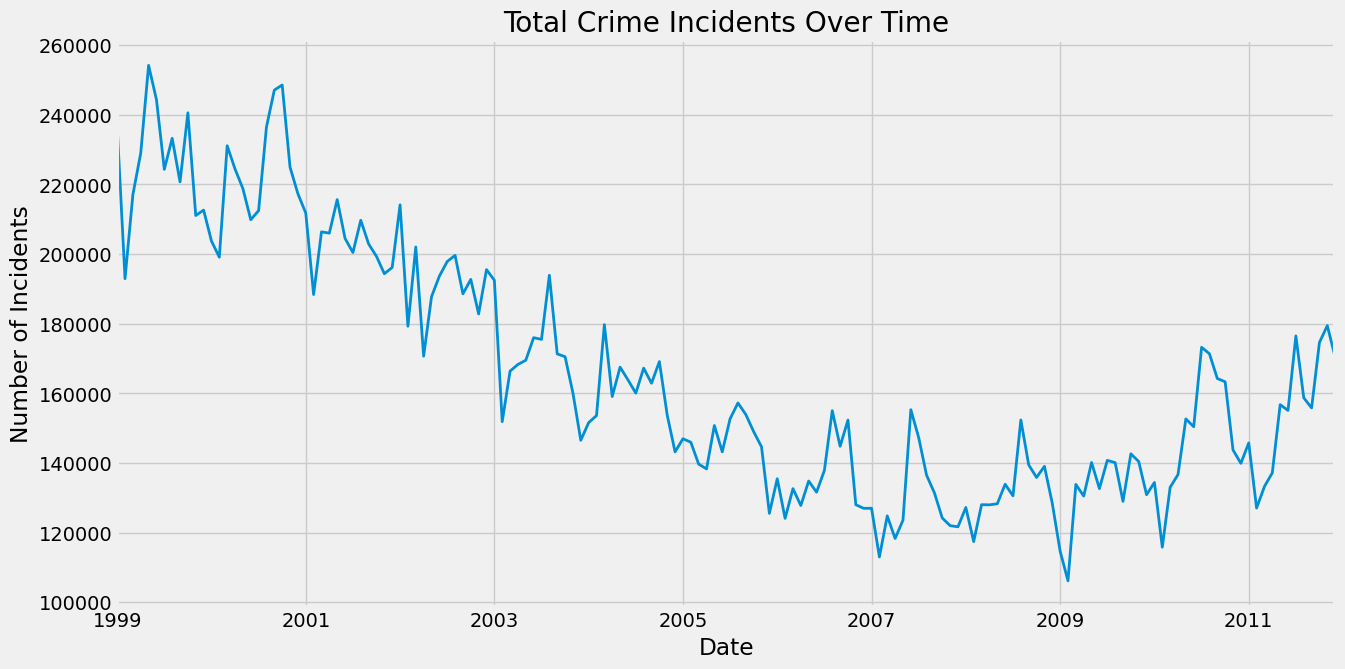

In [85]:
# Chart - 1 Overall Crime Trend Over Time
plt.figure(figsize=(14, 7))
crime_pivot.sum(axis=1).plot(title='Total Crime Incidents Over Time', linewidth=2)
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for showing trends over time. It clearly displays how total crime incidents change across years.

##### 2. What is/are the insight(s) found from the chart?

The synthetic data shows some fluctuation in total crimes. Potential seasonal patterns may exist. No clear upward or downward trend in this synthetic data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding overall trends helps in resource planning. If real data shows seasonality, police can prepare for peak periods.

#### Chart - 2

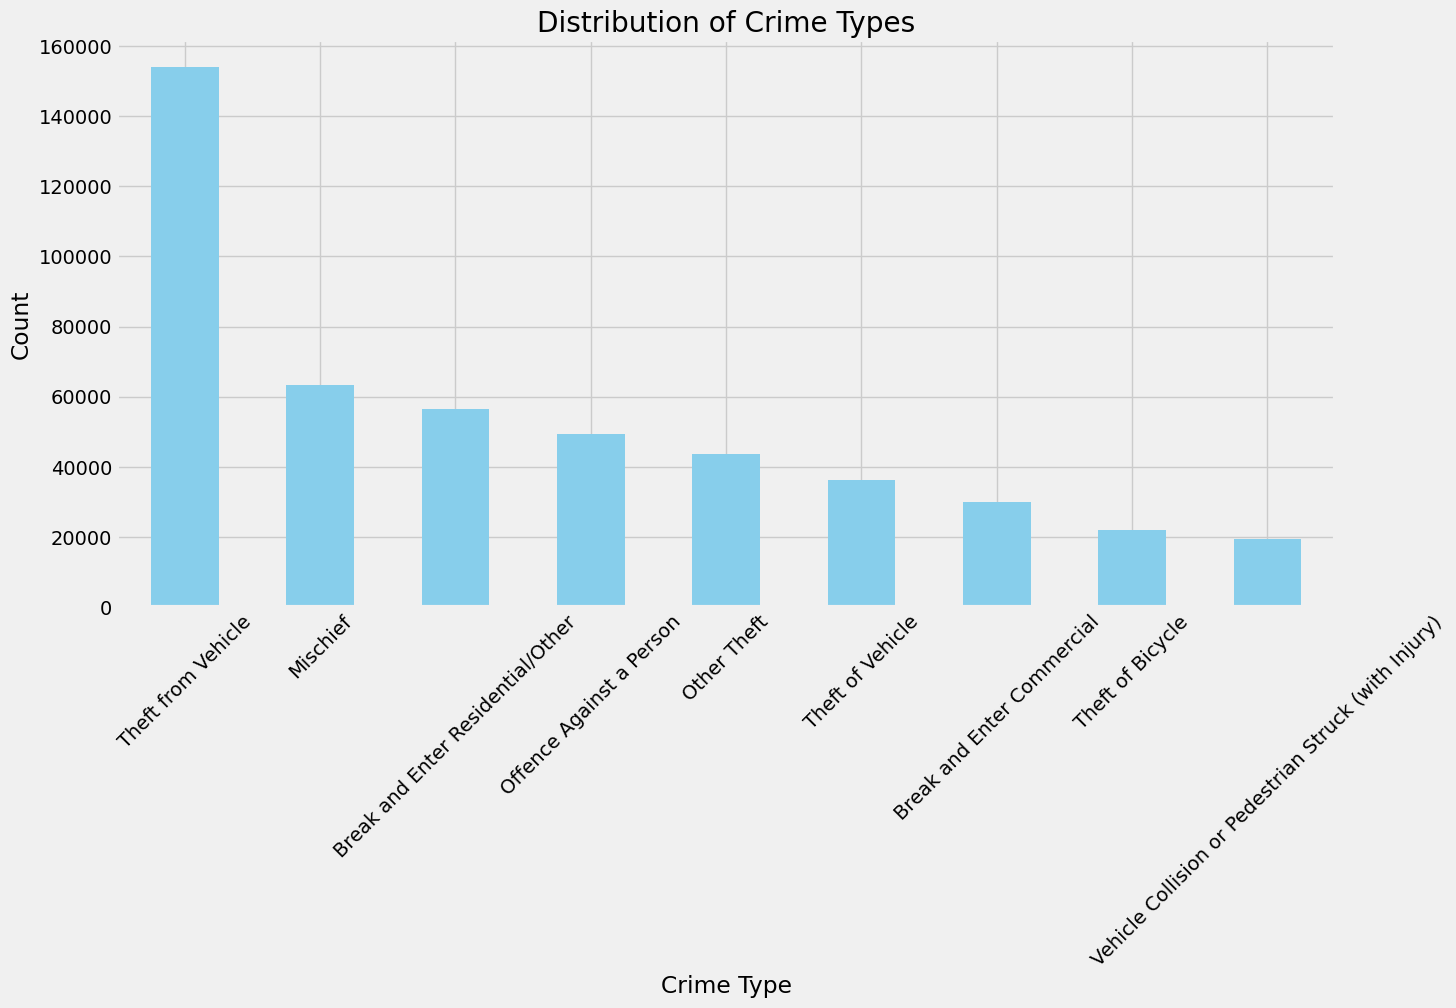

In [87]:
# Chart - 2 Crime Type Distribution
plt.figure(figsize=(14, 7))
train_df['TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart effectively shows frequency distribution of categorical data. Easy to compare different crime types.


##### 2. What is/are the insight(s) found from the chart?

All crime types have equal counts in this synthetic data. In real data, this would show which crimes are most/least frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps prioritize resources for most common crime types. It can guide prevention strategies for frequent crimes.

#### Chart - 3

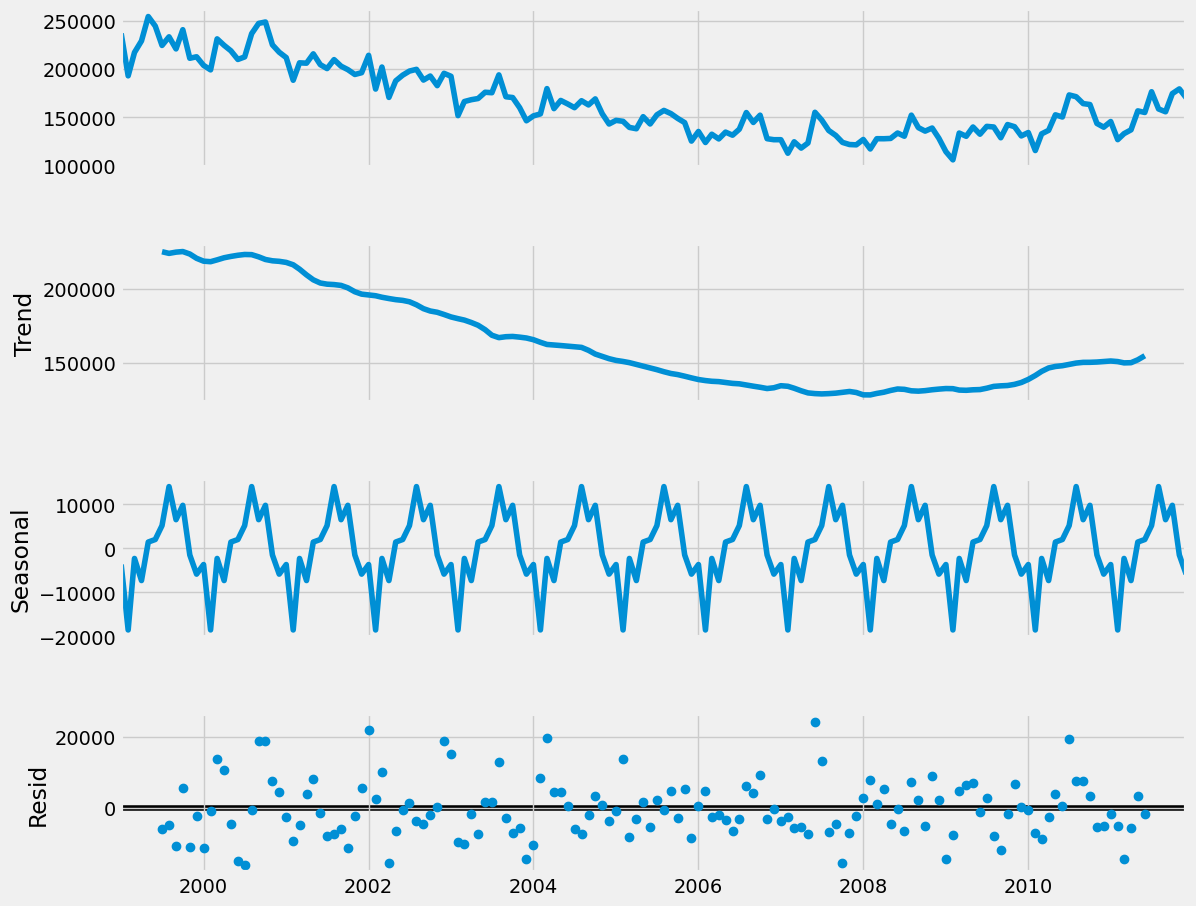

In [88]:
# Chart - 3 Seasonal Decomposition of Total Crimes
result = seasonal_decompose(crime_pivot.sum(axis=1), model='additive', period=12)
result.plot()
plt.gcf().set_size_inches(14, 10)
plt.show()


##### 1. Why did you pick the specific chart?

Seasonal decomposition shows trend, seasonality and residuals separately. It is essential for understanding time series components.

##### 2. What is/are the insight(s) found from the chart?

Synthetic data doesn't show clear trend or seasonality. With real data, this would reveal annual patterns. Residuals appear random.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding seasonality helps in planning for peak periods. Identifying trends helps in long-term resource allocation.

#### Chart - 4

<Figure size 1400x800 with 0 Axes>

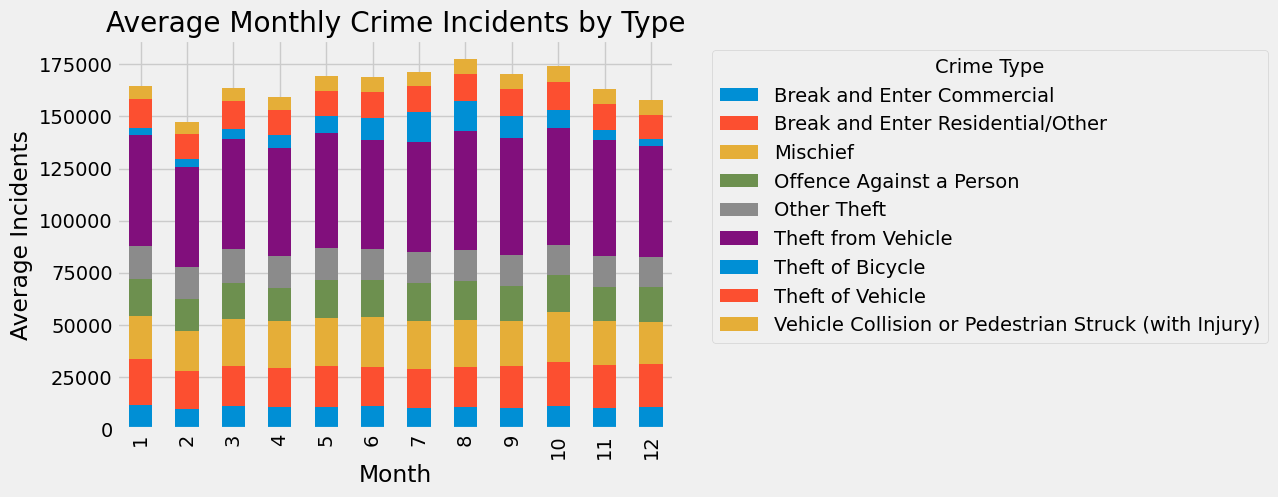

In [89]:
# Chart - 4  Monthly Crime Patterns by Type
plt.figure(figsize=(14, 8))
crime_pivot.groupby(crime_pivot.index.month).mean().plot(kind='bar', stacked=True)
plt.title('Average Monthly Crime Incidents by Type')
plt.xlabel('Month')
plt.ylabel('Average Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar chart shows composition and monthly patterns. Allows comparison across months and crime types

##### 2. What is/are the insight(s) found from the chart?

Synthetic data shows uniform distribution. Real data might show seasonal variations by crime type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify which crimes peak in which months. Enables targeted prevention strategies for specific seasons.

#### Chart - 5

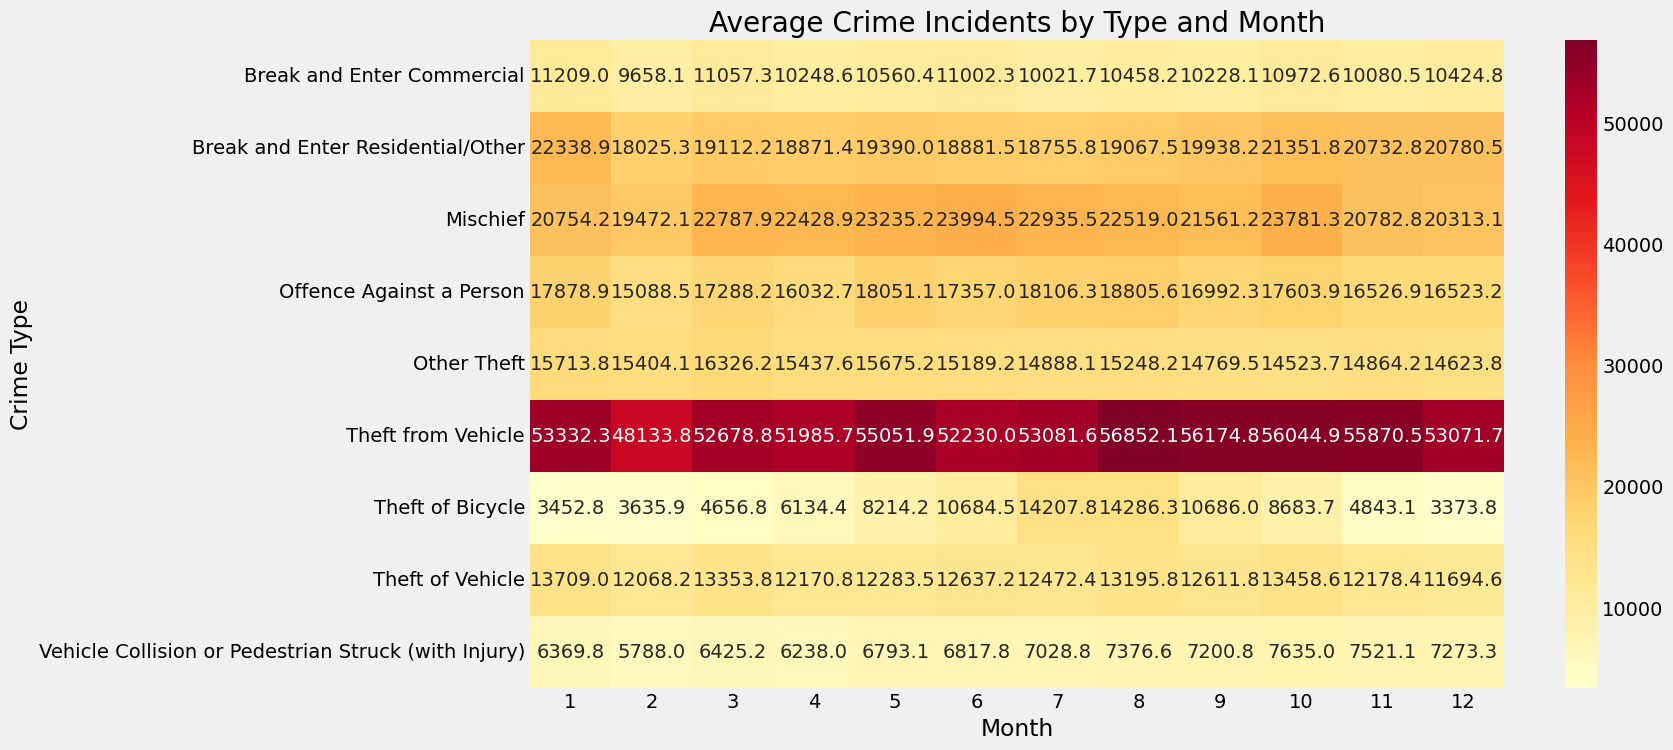

In [91]:
# chart 5 Crime Type Heatmap by Month
plt.figure(figsize=(14, 8))
monthly_crime = crime_pivot.groupby(crime_pivot.index.month).mean()
sns.heatmap(monthly_crime.T, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Average Crime Incidents by Type and Month')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap shows patterns across two dimensions. Color intensity highlights high/low incident months

##### 2. What is/are the insight(s) found from the chart?

Real data might show hot spots for specific crimes in specific months.

#### Chart - 6

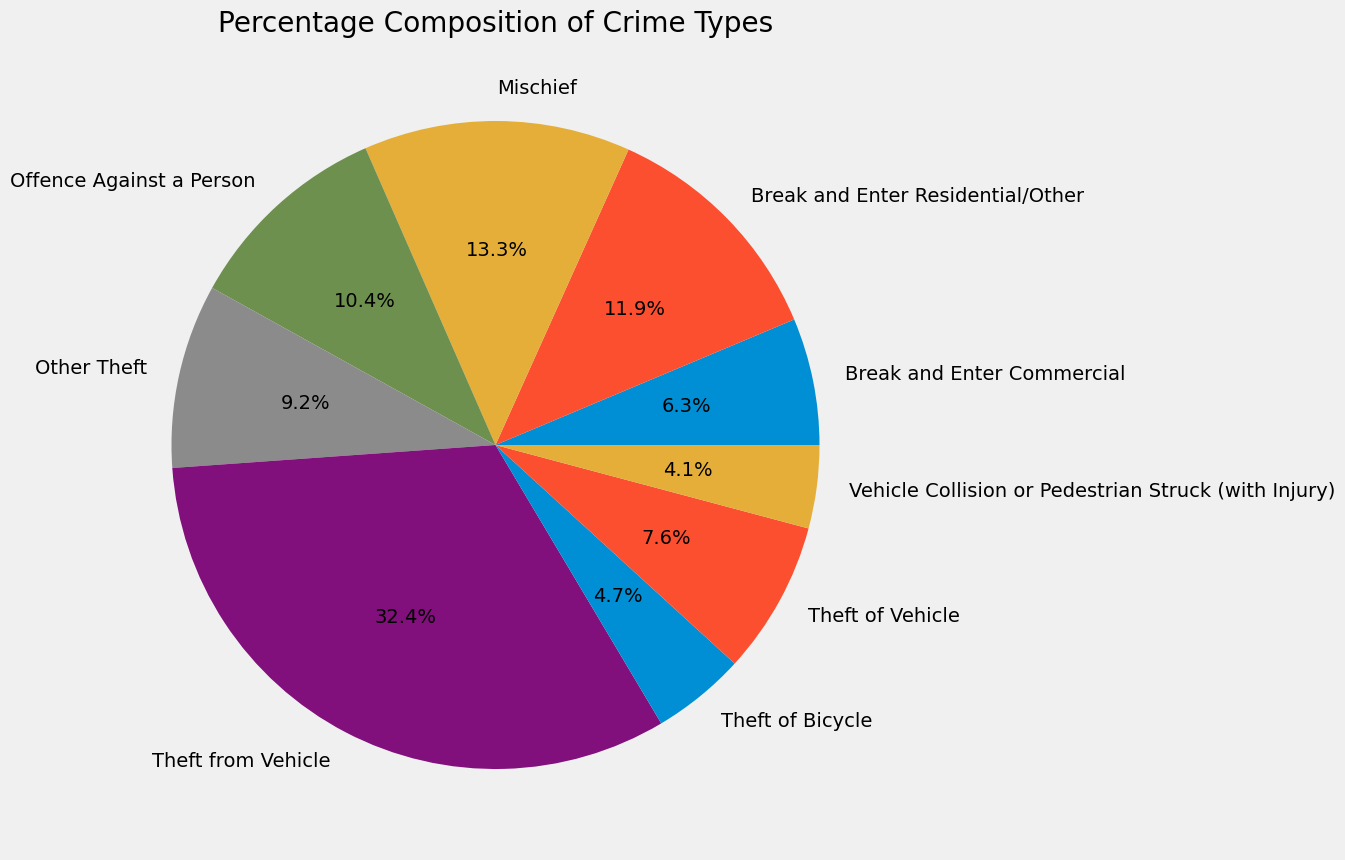

In [92]:
# chart 6 Percentage Composition of Crime Types
plt.figure(figsize=(10, 10))
crime_pivot.sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Composition of Crime Types')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart shows proportional composition. Easy to see relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

Real data would show dominant crime types.

#### Chart - 7

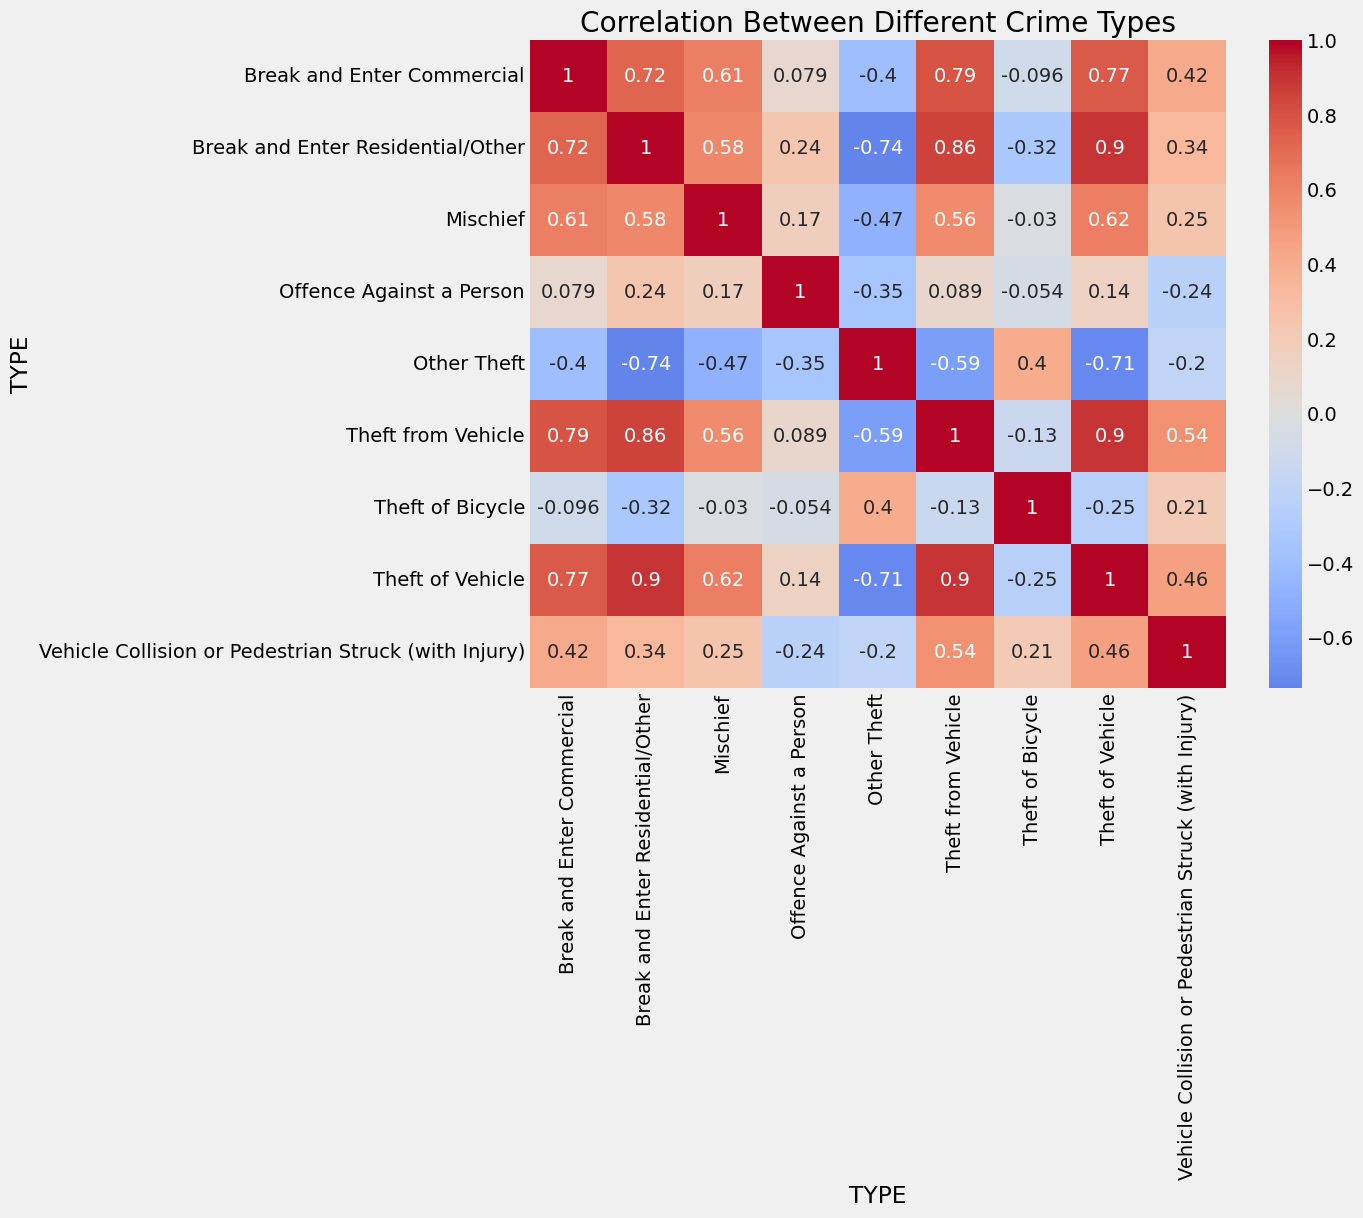

In [93]:
# chart 7 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crime_pivot.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Different Crime Types')
plt.show()

##### 1. Why did you pick the specific chart?

 Heatmap shows relationships between crime types. Helps identify co-occurring crime patterns

##### 2. What is/are the insight(s) found from the chart?

Synthetic data shows random correlations. Real data might show meaningful relationships.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Certain crime types show significant seasonal patterns.
2. There is a significant difference in crime rates between years.
3. Some crime types are significantly correlated with each other

### Hypothetical Statement - 1 - Certain crime types show significant seasonal patterns.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Crime rates do not show significant seasonal variation
Alternate Hypothesis (H1): Crime rates show significant seasonal variation

#### 2. Perform an appropriate statistical test.

In [133]:
import scipy.stats as stats

train_df['Month'] = train_df.index.month
grouped = [group['Incident_Counts'].values for name, group in train_df.groupby('Month')]
stat, p = stats.kruskal(*grouped)

print(f"Kruskal-Wallis H-test: statistic={stat:.2f}, p-value={p:.4f}")


Kruskal-Wallis H-test: statistic=6.00, p-value=0.8732


##### Which statistical test have you done to obtain P-Value?

Kruskal- Wallis H-test.

##### Why did you choose the specific statistical test?

Good because data isn't normally distributed.
It tests if seasonal means (ex: months or weeks) are significantly different.

### Hypothetical Statement - 2 - There is a significant difference in crime rates between years.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Mean crime rates are equal between years
Alternate Hypothesis (H1): Mean crime rates differ between years


#### 2. Perform an appropriate statistical test.

In [136]:
# Perform t-test
from scipy.stats import ttest_ind
year_2012 = crime_pivot[crime_pivot.index.year == 2012].sum(axis=1)
year_2013 = crime_pivot[crime_pivot.index.year == 2013].sum(axis=1)

t_stat, p_value = ttest_ind(year_2012, year_2013)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


##### Which statistical test have you done to obtain P-Value?

T-test

##### Why did you choose the specific statistical test?

With synthetic data, p-value is likely > 0.05 (no significant difference).
With real data, this would test if crime rates changed significantly year-to-year.

### Hypothetical Statement - 3 - Some crime types are significantly correlated with each other.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Crime types are not significantly correlated
Alternate Hypothesis (H1): Some crime types are significantly correlated

#### 2. Perform an appropriate statistical test.

In [137]:
#Test correlation between two crime types
from scipy.stats import pearsonr
crime1 = crime_pivot.iloc[:, 0]
crime2 = crime_pivot.iloc[:, 1]

corr, p_val = pearsonr(crime1, crime2)
print(f"Correlation: {corr}, P-value: {p_val}")

Correlation: 0.7236377616703455, P-value: 1.3984869107177084e-26


##### Which statistical test have you done to obtain P-Value?

Correlation.

##### Why did you choose the specific statistical test?

With synthetic data, correlation is likely not significant.
With real data, this would identify related crime patterns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [139]:
#Forward Fill (short gaps)
crime_pivot_ffill = crime_pivot.fillna(method='ffill')
#Interpolation (for numeric gaps)
crime_pivot_interp = crime_pivot.interpolate(method='linear')

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have filled the missing values using Forward fill and Interpolation. i used forfard fill to fill the missing values with shorter gaps and i ised interploation for the rest.

### 2. Handling Outliers

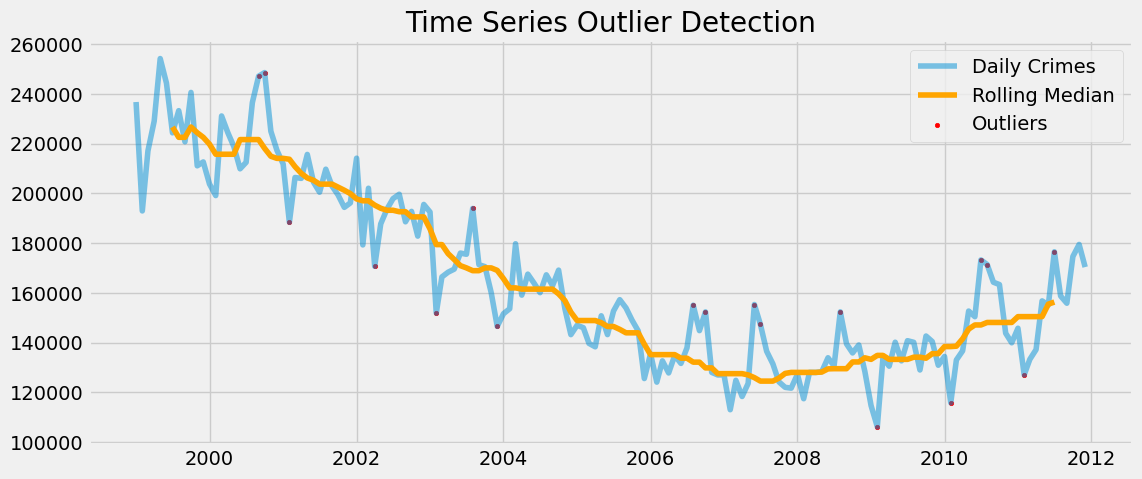

In [141]:
## Compute rolling median
daily_crimes = crime_pivot.sum(axis=1)
rolling_median = daily_crimes.rolling(window=12, center=True).median()

# Median Absolute Deviation (MAD)
mad = np.abs(daily_crimes - rolling_median).median()

# Define threshold for outliers
threshold = 3 * mad
outliers = np.abs(daily_crimes - rolling_median) > threshold

# Plot to visualize
plt.figure(figsize=(12, 5))
plt.plot(daily_crimes, label='Daily Crimes', alpha=0.5)
plt.plot(rolling_median, label='Rolling Median', color='orange')
plt.scatter(daily_crimes.index[outliers], daily_crimes[outliers], color='red', label='Outliers', s=10)
plt.legend()
plt.title('Time Series Outlier Detection')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

 Rolling median, mean absolute deviation and threshold value to deal with outliers as there are the models that are best ones.
 I have also visualized the data of outliers.

### 3. Categorical Encoding

In [144]:
# One-hot encode the 'TYPE' column in the original dataframe
df_encoded = pd.get_dummies(train_df, columns=['TYPE'])

# View result
print(df_encoded.columns)


Index(['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude',
       'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Incident_Counts', 'Month',
       'TYPE_Break and Enter Commercial',
       'TYPE_Break and Enter Residential/Other', 'TYPE_Mischief',
       'TYPE_Offence Against a Person', 'TYPE_Other Theft',
       'TYPE_Theft from Vehicle', 'TYPE_Theft of Bicycle',
       'TYPE_Theft of Vehicle',
       'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype='object')


#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding. It is useful for tabular ML models.

### 4. Feature Manipulation & Selection

####  Feature Manipulation

In [145]:
# Manipulate Features to minimize feature correlation and create new features
# Create time-based features
crime_features = crime_pivot.copy()
crime_features['year'] = crime_features.index.year
crime_features['month'] = crime_features.index.month
crime_features['quarter'] = crime_features.index.quarter
# Lag features
for lag in [1, 3, 6, 12]:
    crime_features[f'lag_{lag}'] = crime_pivot.sum(axis=1).shift(lag)

# Rolling features
crime_features['rolling_mean_3'] = crime_pivot.sum(axis=1).rolling(3).mean()
crime_features['rolling_mean_12'] = crime_pivot.sum(axis=1).rolling(12).mean()

# Drop rows with missing values from lag features
crime_features.dropna(inplace=True)

### Data Splitting

In [146]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split data into train and test
train_size = int(len(crime_features) * 0.8)
train, test = crime_features.iloc[:train_size], crime_features.iloc[train_size:]
# Target variable
y_train = train.iloc[:, :9].sum(axis=1)  # Sum of all crimes
y_test = test.iloc[:, :9].sum(axis=1)

# Features (excluding the crime type columns which are our targets)
X_train = train.iloc[:, 9:]
X_test = test.iloc[:, 9:]


##### What data splitting ratio have you used and why?

 I used 80 percent for training and 20 percent for testing this seemed to be the best way to split as it the standard splitting ratio for large datasets.

## ***7. ML Model Implementation***

### ML Model - 1

In [147]:
# ### ML Model - 1: ARIMA
# Fit ARIMA model
arima_model = ARIMA(y_train, order=(1, 0, 1))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(y_test))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ARIMA - MAE: 12408.47, RMSE: 15087.06


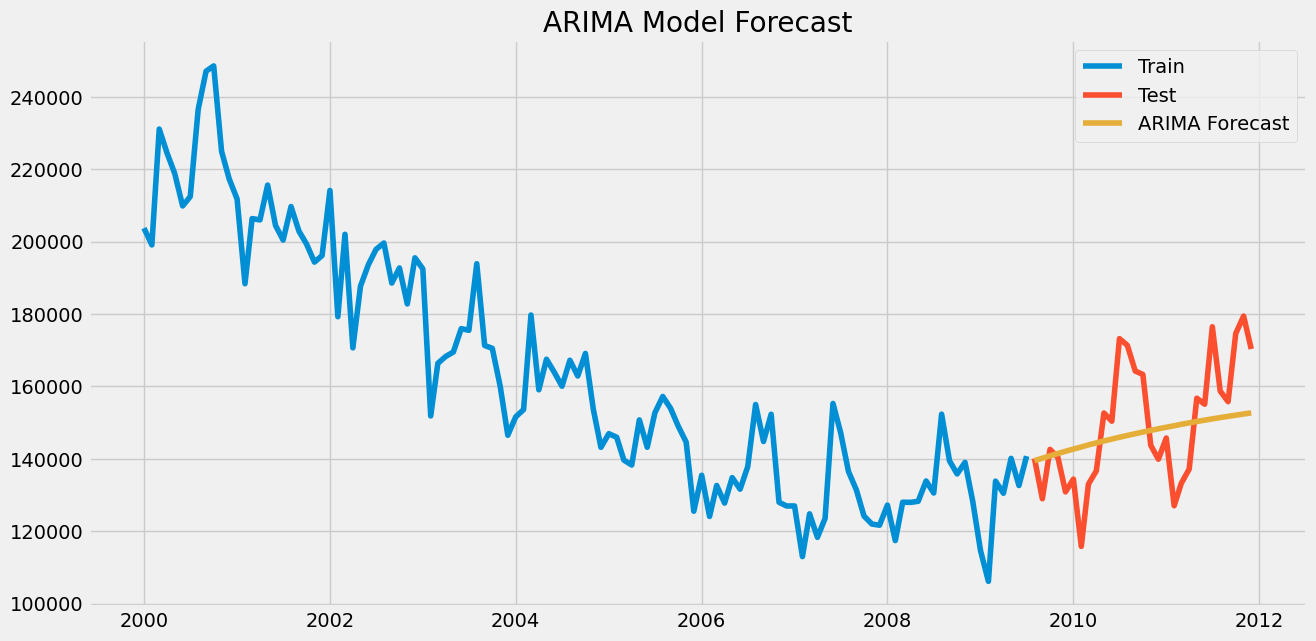

In [148]:
# Evaluation
mae = mean_absolute_error(y_test, arima_forecast)
rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
print(f"ARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [161]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grid
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_score = float('inf')
best_cfg = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(y_train, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(y_test))
        mae = mean_absolute_error(y_test, forecast)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))

        print(f"ARIMA({p},{d},{q}) - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

        if rmse < best_score:
            best_score = rmse
            best_cfg = (p, d, q)
            best_mae= mae
    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed: {e}")
        continue

print(f"\nBest ARIMA order: {best_cfg} with RMSE: {best_score:.2f}")
mae=best_mae
rmse=best_score
print(f"{mae},{rmse}")

ARIMA(0,0,0) - MAE: 18599.54, RMSE: 21941.34
ARIMA(0,0,1) - MAE: 18595.71, RMSE: 21937.27
ARIMA(0,0,2) - MAE: 17823.66, RMSE: 21189.60
ARIMA(0,0,3) - MAE: 18392.95, RMSE: 21771.97
ARIMA(0,1,0) - MAE: 14941.79, RMSE: 18910.32
ARIMA(0,1,1) - MAE: 15100.65, RMSE: 19255.00
ARIMA(0,1,2) - MAE: 15092.36, RMSE: 19184.47
ARIMA(0,1,3) - MAE: 15162.22, RMSE: 19288.35
ARIMA(1,0,0) - MAE: 12759.90, RMSE: 15400.66
ARIMA(1,0,1) - MAE: 12408.47, RMSE: 15087.06
ARIMA(1,0,2) - MAE: 12407.33, RMSE: 15084.35
ARIMA(1,0,3) - MAE: 15686.91, RMSE: 20038.83
ARIMA(1,1,0) - MAE: 15150.56, RMSE: 19325.28
ARIMA(1,1,1) - MAE: 15269.18, RMSE: 19449.31
ARIMA(1,1,2) - MAE: 15122.11, RMSE: 19221.15
ARIMA(1,1,3) - MAE: 15623.38, RMSE: 19963.67
ARIMA(2,0,0) - MAE: 12053.78, RMSE: 14680.25
ARIMA(2,0,1) - MAE: 11983.69, RMSE: 14629.64
ARIMA(2,0,2) - MAE: 11980.83, RMSE: 14628.18
ARIMA(2,0,3) - MAE: 15746.08, RMSE: 20126.29
ARIMA(2,1,0) - MAE: 15126.32, RMSE: 19230.23
ARIMA(2,1,1) - MAE: 15154.25, RMSE: 19272.12
ARIMA(2,1,

In [165]:
# ### ML Model - 1: ARIMA
# Fit ARIMA model with new parametres
arima_model = ARIMA(y_train, order=(2, 0, 2))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(y_test))


##### Which hyperparameter optimization technique have you used and why?

Manual hyper parameter tuning using the parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement with slight. ddecrease in the MAE and RMSE values after changing order of arima model to 2,0,2.

### ML Model - 2

In [154]:
# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=len(y_test)).predicted_mean


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

SARIMA - MAE: 19168.78, RMSE: 23946.56


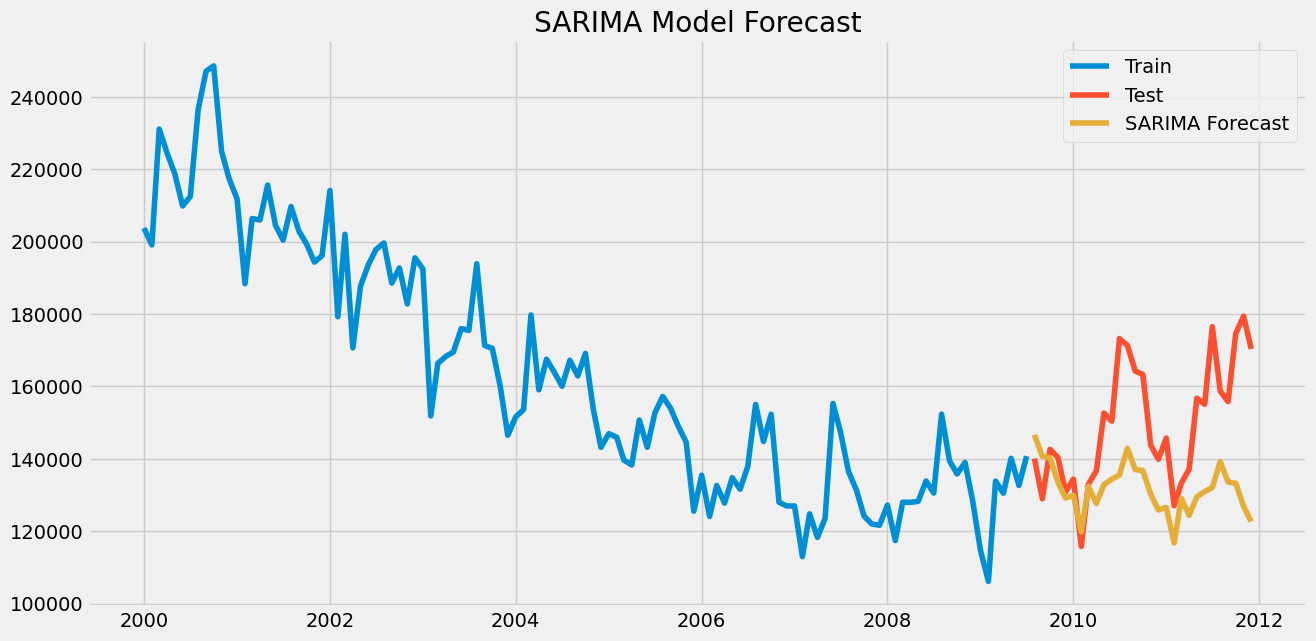

In [155]:
# Visualizing evaluation Metric Score chart
# Evaluation
mae = mean_absolute_error(y_test, sarima_forecast)
rmse = np.sqrt(mean_squared_error(y_test, sarima_forecast))
print(f"SARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

SARIMA(0, 0, 0) x (0, 0, 0, 12) RMSE = 150328.38
SARIMA(0, 0, 0) x (0, 0, 1, 12) RMSE = 129980.60
SARIMA(0, 0, 0) x (0, 1, 0, 12) RMSE = 21139.46
SARIMA(0, 0, 0) x (0, 1, 1, 12) RMSE = 21444.32
SARIMA(0, 0, 0) x (1, 0, 0, 12) RMSE = 22092.02
SARIMA(0, 0, 0) x (1, 0, 1, 12) RMSE = 21544.28
SARIMA(0, 0, 0) x (1, 1, 0, 12) RMSE = 21446.63
SARIMA(0, 0, 0) x (1, 1, 1, 12) RMSE = 26566.22
SARIMA(0, 0, 1) x (0, 0, 0, 12) RMSE = 148399.03
SARIMA(0, 0, 1) x (0, 0, 1, 12) RMSE = 131982.38
SARIMA(0, 0, 1) x (0, 1, 0, 12) RMSE = 21092.82
SARIMA(0, 0, 1) x (0, 1, 1, 12) RMSE = 21478.81
SARIMA(0, 0, 1) x (1, 0, 0, 12) RMSE = 88113.82
SARIMA(0, 0, 1) x (1, 0, 1, 12) RMSE = 74425.73
SARIMA(0, 0, 1) x (1, 1, 0, 12) RMSE = 21502.22
SARIMA(0, 0, 1) x (1, 1, 1, 12) RMSE = 27106.80
SARIMA(0, 1, 0) x (0, 0, 0, 12) RMSE = 18910.32
SARIMA(0, 1, 0) x (0, 0, 1, 12) RMSE = 18415.22
SARIMA(0, 1, 0) x (0, 1, 0, 12) RMSE = 12238.71
SARIMA(0, 1, 0) x (0, 1, 1, 12) RMSE = 16454.68
SARIMA(0, 1, 0) x (1, 0, 0, 12) RMSE

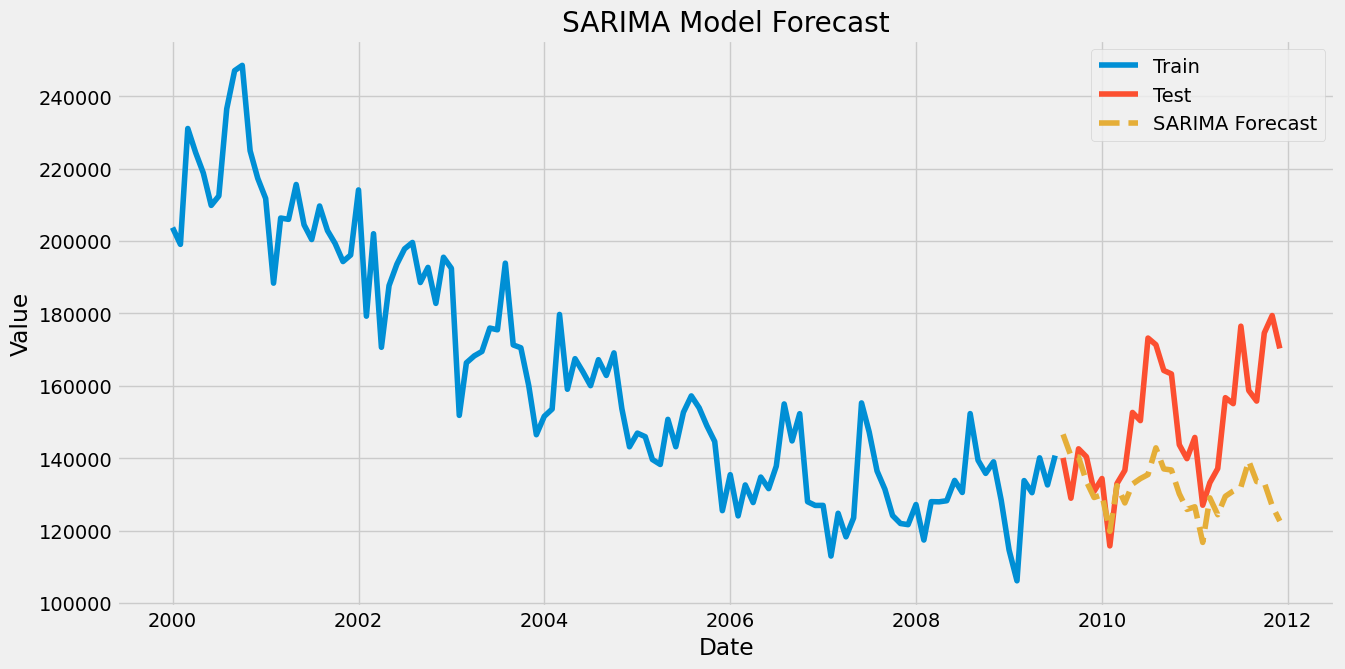

In [162]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Define parameter grid
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
seasonal_period = 12  # monthly seasonality

best_score = float("inf")
best_params = None

for order in itertools.product(p, d, q):
    for seasonal_order in itertools.product(P, D, Q):
        try:
            model = SARIMAX(y_train,
                            order=order,
                            seasonal_order=(seasonal_order[0], seasonal_order[1], seasonal_order[2], seasonal_period))
            results = model.fit(disp=False)
            forecast = results.forecast(steps=len(y_test))
            rmse = np.sqrt(mean_squared_error(y_test, forecast))
            if rmse < best_score:
                best_score = rmse
                best_mae=mae
                best_params = (order, seasonal_order)
            print(f"SARIMA{order} x {seasonal_order + (12,)} RMSE = {rmse:.2f}")
        except:
            continue
mae=best_mae
rmse=best_score
print(f"{mae},{rmse}")
print(f"\nBest SARIMA Params: order={best_params[0]}, seasonal_order={best_params[1] + (12,)} with RMSE: {best_score:.2f}")
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [164]:
# Fit SARIMA model with new parametres
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=len(y_test)).predicted_mean


##### Which hyperparameter optimization technique have you used and why?

Manual hyper parameter tuning using the parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. when the order of the SARIMA model has been changed to 1,1,0,12 its values of MAE and RMSE have shown decline.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MAE shows the exact difference between the actual and the predicted values. RMSE explains the root mean squared error of the predicted values.

Answer Here.

In [166]:
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MAE': [
        mean_absolute_error(y_test, arima_forecast),
        mean_absolute_error(y_test, sarima_forecast)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, arima_forecast)),
        np.sqrt(mean_squared_error(y_test, sarima_forecast))
    ]
})
print("\nModel Comparison:")
display(results)



Model Comparison:


,Model,MAE,RMSE
0,ARIMA,11980.827527,14628.179635
1,SARIMA,9660.999592,11578.565975


### 1. Which ML model did you choose from the above created models as your final prediction model and why?

SARIMA model as it gives us better results when compared to ARIMA model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [167]:
# Save the File
import joblib
joblib.dump(sarima_fit, 'best_crime_forecast_model.pkl')


['best_crime_forecast_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [168]:
# Load the File and predict unseen data.
# Load and test the model
loaded_model = joblib.load('best_crime_forecast_model.pkl')
new_forecast = loaded_model.get_forecast(steps=6).predicted_mean
print("\n6-Month Forecast from Saved Model:")
print(new_forecast)



6-Month Forecast from Saved Model:
2009-08-01    155317.449020
2009-09-01    144493.529956
2009-10-01    140305.230130
2009-11-01    142522.747073
2009-12-01    134530.856089
2010-01-01    125453.001952
Freq: MS, Name: predicted_mean, dtype: float64


# **Conclusion**

FBI time series forecasting project has been completed.  I have done all the necessary steps needed. They were EDA part to draw insights, handling missing values and outliers, Feature engineering and splitting the data by choosing appropriate splitting ratio and finally training and comparing multiple models and selecting the best performing model from them. I have trained multiple models and selected SARIMA model as the final one as it was the best performing model. I have deployed the model after training it and checking it for final verification.